### Illegal Dump Sites In Allegheny County

Another factor to consider in the decision of the best neighborhood in Pittsburgh is the amount of trash in the county. The amount of trash affects the living conditions, having an effect on pollution as well as beauty of the neighborhood. Below is the CSV visualization:

In [300]:
import fpsnippets
%matplotlib inline
import matplotlib.pyplot as plt
illegal_dump = pd.read_csv('trash.csv')
illegal_dump.head()

,_id,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude
0,1,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525
1,2,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393
2,3,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675
3,4,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958
4,5,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912


We then went through the CSV, first making sure it only includes illegal dump sites in Pittsburgh. We then converted the estimated tons to be processed numerically, and also split the rows where two neighborhoods are listed.

Next, we simply summed up the estimated tons of trash in each neighborhood and created a new dataframe with this information. 

In [291]:

# filter for only neighborhoods in Pittsburgh
illegal_dump = illegal_dump[illegal_dump['City'] == 'Pittsburgh']
illegal_dump['estimated_tons'] = pd.to_numeric(illegal_dump['estimated_tons'], errors='coerce')
# realized when trying to sum that the estimated tons was not being seen as a number, so this line rectifies that by converting it to numeric

# for ones where two neighborhoods are listed, it is separated into two rows with the tons counting for both
illegal_dump['Neighborhood'] = illegal_dump['Neighborhood'].str.split('/')
illegal_dump = illegal_dump.explode('Neighborhood')
illegal_dump['Neighborhood'] = illegal_dump['Neighborhood'].str.strip()

# took sum of tons of trash in each neighborhood and made a new table
grouped_illegal_dump = illegal_dump.groupby('Neighborhood')['estimated_tons'].sum().reset_index()
grouped_illegal_dump.columns = ['Neighborhood', 'Total Tons']
grouped_illegal_dump.head(10)


,Neighborhood,Total Tons
0,Allentown,10.4
1,Arlington,17.5
2,Banksville,1.0
3,Bedford Dwellings,1.0
4,Beechview,11.0
5,Beltzhoover,1053.0
6,Bloomfield,5.0
7,Bluff,1.0
8,Borough of Millvale,1.0
9,Brighton Heights,6.8


Next, we sorted the table of total tons of trash in illegal dump sites in each neighborhood, so that it is in ascending order. Using this information, we were able to see the neighborhoods with the least tons of trash.

In [270]:
grouped_illegal_dump_sorted = grouped_illegal_dump.sort_values(by='Total Tons', ascending=True)
grouped_illegal_dump_sorted.head()

,Neighborhood,Total Tons
24,East Liberty,0.0
65,Springdale,0.0
55,Point Breeze North,0.3
68,Strip District,0.3
38,Homewood West,0.5


As we can see here, the neighborhoods with the least tons of trash are **East Liberty** and **Springdale** with **0 tons of trash** in illegal dump sites. 

We then created bar graphs of both the top 10 and bottom 10 neighborhoods with the most tons of trash. 

This gives us the ability to compare the "best neighborhoods" by this metric to the "best neighborhoods" of our other two metrics.

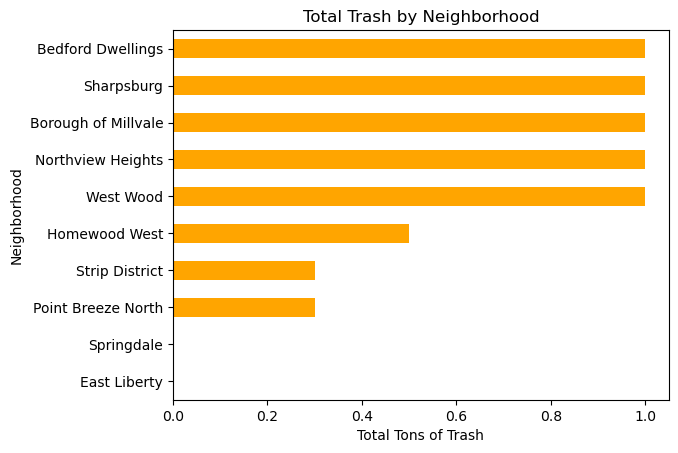

In [272]:
grouped_illegal_dump_sorted.head(10).plot(kind='barh', x='Neighborhood', y='Total Tons', legend=False, color='orange')
plt.xlabel('Total Tons of Trash')
plt.ylabel('Neighborhood')
plt.title('Total Trash by Neighborhood')
plt.show()

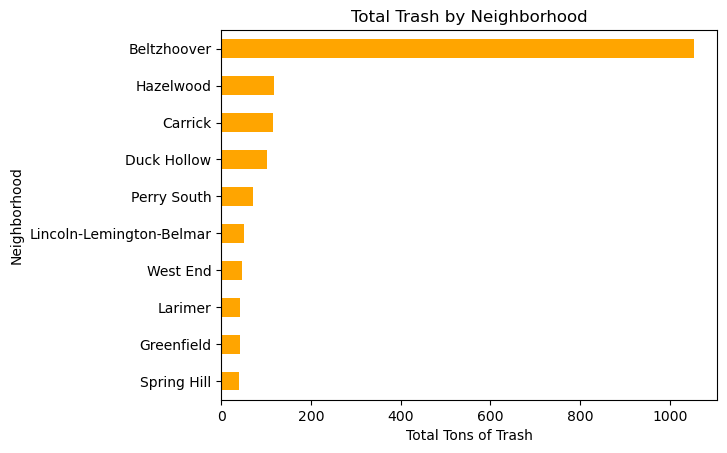

In [274]:
grouped_illegal_dump_sorted.tail(10).plot(kind='barh', x='Neighborhood', y='Total Tons', legend=False, color='orange')
plt.xlabel('Total Tons of Trash')
plt.ylabel('Neighborhood')
plt.title('Total Trash by Neighborhood')
plt.show()